In [1]:
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
%matplotlib inline

#time
import datetime as datetime

#Prophet
from fbprophet import Prophet

from sklearn import metrics

In [31]:
start = datetime.datetime(2015,1,5)
df_0012 = pdr.DataReader('0012.HK', 'yahoo', start=start)
df_0012.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-05,37.190102,36.370499,36.712002,36.985199,3133364.0,32.326897
2015-01-06,36.985199,36.233898,36.985199,36.507099,4313966.0,31.909012
2015-01-07,36.643700,35.858200,36.507099,36.472900,5385039.0,31.879126
2015-01-08,36.712002,36.165600,36.712002,36.336300,4392054.0,31.759731
2015-01-09,36.677799,36.199699,36.507099,36.370499,5777043.0,31.789618


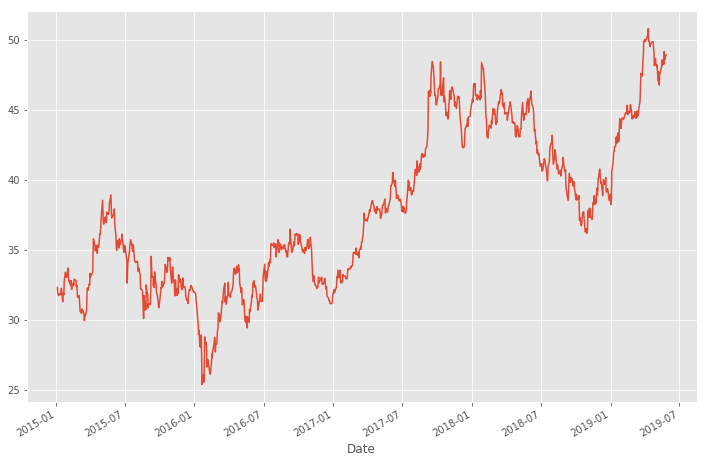

In [3]:
plt.style.use('ggplot')
df_0012['Adj Close'].plot(figsize=(12, 8))

In [35]:
df = df_0012.reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})
df['y'] = np.log(df['y'])

In [37]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365) #forecasting for 1 year from now.
forecast = model.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


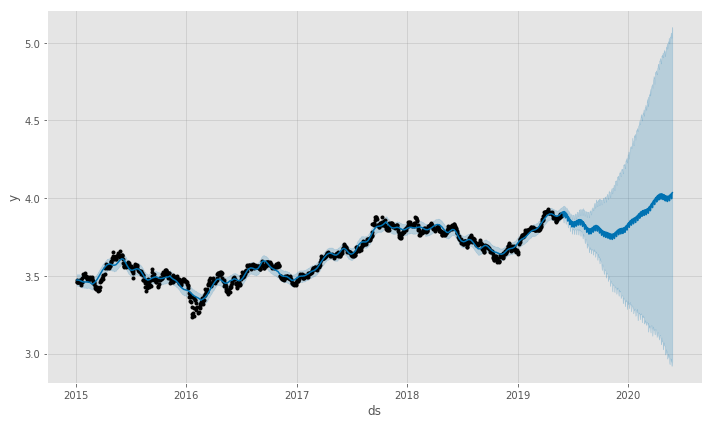

In [38]:
figure=model.plot(forecast)

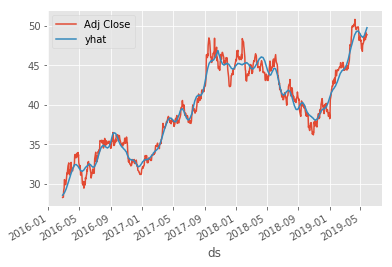

In [45]:
two_years = forecast.set_index('ds').join(df_0012)
two_years = two_years[['Adj Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(800)
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)
two_years[['Adj Close', 'yhat']].plot()

In [51]:
two_years_AE = (two_years.yhat - two_years['Adj Close'])
two_years_AE.describe()

count    800.000000
mean      -0.044080
std        0.984349
min       -3.321914
25%       -0.650008
50%       -0.027570
75%        0.578136
max        2.725729
dtype: float64

In [52]:
print ("MSE:",metrics.mean_squared_error(two_years.yhat, two_years['Adj Close']))

MSE: 0.969674181641


In [53]:
print ("MAE:",metrics.mean_absolute_error(two_years.yhat, two_years['Adj Close']))

MAE: 0.764158903862


Text(0.5, 0, 'Date')

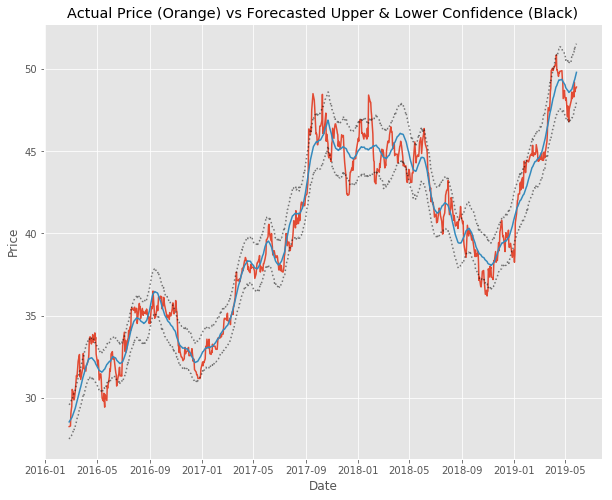

In [54]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot(two_years['Adj Close'])
ax1.plot(two_years.yhat)
ax1.plot(two_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)

ax1.set_title('Actual Price (Orange) vs Forecasted Upper & Lower Confidence (Black)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')